# Responsible AI for Heart Disease Prediction

## Overview
This tutorial demonstrates how to implement Responsible AI principles in a machine learning workflow for heart disease prediction. Using the UCI Heart Disease dataset, we cover:
- Data loading and preprocessing
- Bias detection and fairness analysis
- Privacy protection with differential privacy
- Model training with fairness considerations
- Model explainability through feature importance

The tutorial provides a comprehensive example of building an AI system that considers ethical implications alongside predictive performance.

## Learning Objectives
By completing this tutorial, you will learn to:
- Load and preprocess medical data for machine learning
- Detect potential biases in datasets using statistical tests and visualizations
- Implement differential privacy techniques to protect sensitive data
- Train machine learning models while monitoring fairness across demographic groups
- Interpret model decisions through feature importance analysis
- Generate visual reports to communicate model behavior and potential biases


## Prerequisites
To follow this tutorial, you should have:
- Basic knowledge of Python programming
- Familiarity with pandas and numpy for data manipulation
- Understanding of machine learning concepts (classification, train-test split)
- Basic statistics knowledge (t-tests, distributions)
- These Python packages installed: pandas,  numpy, scikit-learn, matplotlib, seaborn, scipy

## Get Started
Let’s begin by loading the dataset and performing the following workflow. 
- Load and preprocess the heart disease dataset
- Generate visualizations of age and sex distributions
- Print statistical tests for bias detection
- Train a Random Forest classifier with privacy protection
- Evaluate model fairness across demographic groups
- Create feature importance plots

## UCI Heart Disease Dataset

**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease)  
**Primary Use**: Classification tasks in health and medicine  

## Overview

- **Datasets Included**: Four datasets from Cleveland, Hungary, Switzerland, and the VA Long Beach
- **Instances**: 303
- **Total Attributes**: 76, with 14 commonly used in research
- **Missing Values**: Yes
- **Target Variable**: `num` (0: no presence of heart disease; 1–4: increasing levels of presence)

## Commonly Used Features (14)

| Feature      | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| `age`        | Age in years                                                                |
| `sex`        | Sex (1 = male; 0 = female)                                                  |
| `cp`         | Chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) |
| `trestbps`   | Resting blood pressure (in mm Hg)                                           |
| `chol`       | Serum cholesterol (in mg/dl)                                                |
| `fbs`        | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                       |
| `restecg`    | Resting electrocardiographic results (0 = normal; 1 = ST-T wave abnormality; 2 = left ventricular hypertrophy) |
| `thalach`    | Maximum heart rate achieved                                                 |
| `exang`      | Exercise-induced angina (1 = yes; 0 = no)                                   |
| `oldpeak`    | ST depression induced by exercise relative to rest                          |
| `slope`      | Slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) |
| `ca`         | Number of major vessels (0–3) colored by fluoroscopy                        |
| `thal`       | Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)           |
| `num`        | Diagnosis of heart disease (0 = absence; 1–4 = presence)                    |

## Notes

- While the dataset contains 76 attributes, most studies focus on the 14 listed above, particularly from the Cleveland dataset.
- The `num` field is often converted to a binary classification: 0 (no heart disease) and 1 (presence of heart disease).

For more detailed information and access to the dataset, visit the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease).


### Import Libraries

In [13]:
# Import necessary libraries
# Data manipulation and analysis
import pandas as pd

# Numerical computing
import numpy as np   

# Splitting data into train/test sets
from sklearn.model_selection import train_test_split  

# Random Forest classification algorithm
from sklearn.ensemble import RandomForestClassifier  

# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report  

# Feature scaling/normalization
from sklearn.preprocessing import StandardScaler  

# Data visualization
import matplotlib.pyplot as plt  

# Enhanced data visualization (built on matplotlib)
import seaborn as sns  

# Statistical hypothesis testing (t-tests)
from scipy.stats import ttest_ind  

# Suppress FutureWarnings to keep output clean
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Enable Jupyter Notebook to display matplotlib plots inline
%matplotlib inline

### 1. Data Loading and Preprocessing

In [14]:
def load_heart_disease_data():
    """
    Loads and preprocesses the Cleveland Heart Disease dataset from UCI Machine Learning Repository.
    
    Returns:
        pd.DataFrame: Cleaned dataframe with:
            - Missing values removed
            - Binary target variable (0=no disease, 1=disease)
            - Proper column names
    """
    
    # Dataset URL from UCI Machine Learning Repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    
    # Column names for the dataset (original data doesn't include headers)
    columns = [
        'age',        # Age in years
        'sex',        # Sex (1 = male; 0 = female)
        'cp',         # Chest pain type (1-4)
        'trestbps',   # Resting blood pressure (mm Hg)
        'chol',       # Serum cholesterol (mg/dl)
        'fbs',        # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        'restecg',    # Resting electrocardiographic results (0-2)
        'thalach',    # Maximum heart rate achieved
        'exang',      # Exercise induced angina (1 = yes; 0 = no)
        'oldpeak',    # ST depression induced by exercise relative to rest
        'slope',      # Slope of the peak exercise ST segment
        'ca',         # Number of major vessels (0-3) colored by fluoroscopy
        'thal',       # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
        'target'      # Diagnosis of heart disease (0-4)
    ]
    
    # Load raw data with:
    # - Specified column names
    # - '?' treated as missing values
    df = pd.read_csv(url, names=columns, na_values='?')
    
    # Data Cleaning:
    # Remove rows with any missing values (original dataset uses '?' for missing)
    df = df.dropna()
    
    # Convert target to binary classification:
    # Original values: 0 = no disease, 1-4 = varying degrees of disease
    # New values: 0 = no disease, 1 = any presence of disease
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
    
    return df

In [15]:
# Execute data loading function to get the processed heart disease dataset
# This calls our previously defined load_heart_disease_data() function which:
# 1. Downloads the Cleveland dataset from UCI
# 2. Cleans missing values
# 3. Converts target to binary classification
df = load_heart_disease_data()

# Print dataset metadata for verification
# Shape shows (number_of_rows, number_of_columns)
print("Dataset loaded. Shape:", df.shape)
# This helps confirm we successfully loaded the expected amount of data

# Display first 5 rows of the DataFrame
# This serves multiple purposes:
# 1. Visual verification that data loaded correctly
# 2. Quick check of feature values and distributions
# 3. Verification of the binary target conversion
# 4. Inspection of column headers and data types
df.head()

Dataset loaded. Shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2. Fairness Check: Analyze potential biases

In [16]:
def check_data_bias(df):
    """
    Analyzes potential biases in the heart disease dataset by:
    - Visualizing distributions of age and sex across disease status
    - Conducting statistical tests for significant differences
    
    Args:
        df (pd.DataFrame): Processed heart disease dataframe with binary 'target' column
        
    Returns:
        bool: True if significant bias detected (p-value < 0.05 for either age or sex), False otherwise
    """
    
    # =============================================
    # Age Distribution Analysis
    # =============================================
    plt.figure(figsize=(8, 6))
    # Stacked histogram showing age distribution split by disease status
    # Helps visualize if certain age groups are overrepresented in disease cases
    sns.histplot(
        data=df,
        x='age',          # Analyze age distribution
        hue='target',     # Color by disease status (0=healthy, 1=disease)
        multiple='stack'  # Stack bars for better comparison
    )
    plt.title('Age Distribution by Heart Disease Status')
    plt.show()
    
    # =============================================
    # Sex Distribution Analysis  
    # =============================================
    plt.figure(figsize=(8, 6))
    # Countplot showing sex representation in disease vs healthy groups
    # Helps identify gender disparities in the dataset
    sns.countplot(
        data=df,
        x='sex',      # Analyze sex distribution (0=female, 1=male)
        hue='target'   # Split by disease status
    )
    plt.title('Sex Distribution by Heart Disease Status')
    plt.show()
    
    # =============================================
    # Statistical Tests for Bias
    # =============================================
    
    # Age Bias Test - Independent t-test
    # Compares mean age between disease and healthy groups
    age_disease = df[df['target'] == 1]['age']      # Ages of patients with disease
    age_no_disease = df[df['target'] == 0]['age']   # Ages of healthy patients
    t_stat, p_val_age = ttest_ind(age_disease, age_no_disease)
    print(f"Age bias t-test p-value: {p_val_age:.4f}")  # Significant if p < 0.05
    
    # Sex Bias Test - Independent t-test
    # Compares sex proportion between disease and healthy groups
    # Note: T-test on binary sex variable (0/1) effectively tests proportion differences
    sex_disease = df[df['target'] == 1]['sex']      # Sex of patients with disease  
    sex_no_disease = df[df['target'] == 0]['sex']   # Sex of healthy patients
    t_stat, p_val_sex = ttest_ind(sex_disease, sex_no_disease)
    print(f"Sex bias t-test p-value: {p_val_sex:.4f}")  # Significant if p < 0.05
    
    # Return True if either age or sex shows statistically significant bias
    return p_val_age < 0.05 or p_val_sex < 0.05

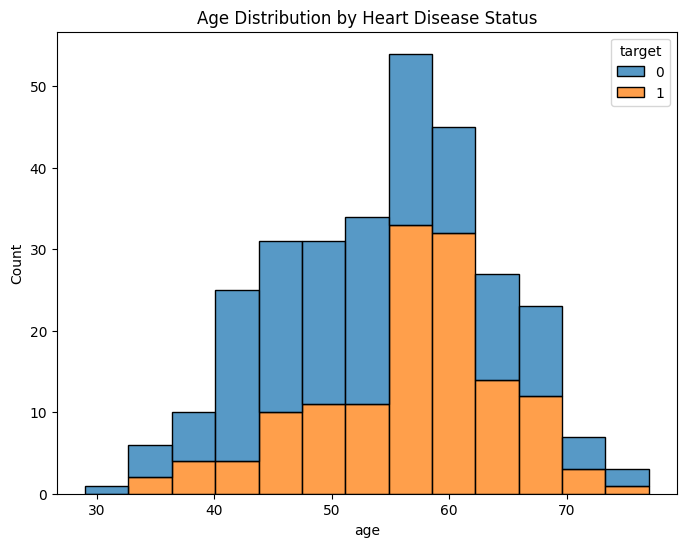

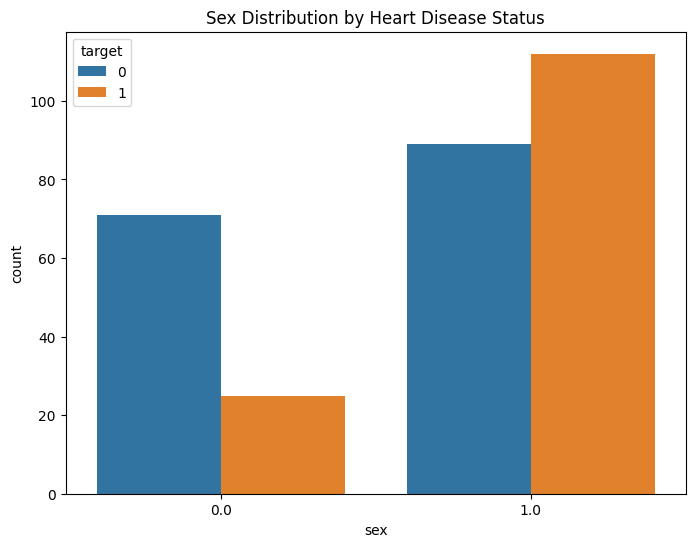

Age bias t-test p-value: 0.0001
Sex bias t-test p-value: 0.0000


In [17]:
# Execute the data bias checking function on our heart disease DataFrame
# This will:
# 1. Generate visualizations of age and sex distributions by disease status
# 2. Perform statistical tests for significant differences
# 3. Return True if significant bias is found (p-value < 0.05 for either age or sex)
has_bias = check_data_bias(df)

# Evaluate and report the results of the bias check
if has_bias:
    # If bias was detected (function returned True)
    print("Warning: Potential bias detected in age or sex distribution")
else:
    # If no significant bias was found (function returned False)
    print("No significant bias detected in age or sex distribution")
    # Note: This doesn't guarantee absence of all biases, just those we tested for

Let's understand potential biases in the UCI Heart Disease dataset regarding age and sex distributions.

#### Age Distribution by Heart Disease Status (First Plot)
The histogram shows the distribution of ages for patients with and without heart disease:
- **Blue (target = 0)**: Patients without heart disease.
- **Orange (target = 1**): Patients with heart disease.
- **Observation**:
    - The age distribution for those without heart disease (blue) has a wider spread, with a noticeable presence in younger age groups (around 30–50 years).
    - The distribution for those with heart disease (orange) is more concentrated in older age groups, particularly between 50–70 years.
    - There is a clear shift: older individuals are more likely to have heart disease, while younger individuals are more likely to be free of it.
- **Implication**:
    - This suggests a potential age-related bias in the dataset. Heart disease appears more prevalent in older age groups, which aligns with medical knowledge but could bias a model to overpredict heart disease in older patients and underpredict in younger ones if not handled carefully.
 
#### Sex Distribution by Heart Disease Status (Second Plot)
The count plot shows the distribution of sexes (0 = Female, 1 = Male) for patients with and without heart disease:
- **Blue (target = 0)**: Patients without heart disease.
- **Orange (target = 1)**: Patients with heart disease.
- **Observation**:
    - For females (sex = 0), there are more individuals without heart disease (blue) than with heart disease (orange).
    - For males (sex = 1), the number of individuals with heart disease (orange) is significantly higher than those without (blue).
    - The dataset has more males than females overall, and males are disproportionately more likely to have heart disease.
- **Implication**:
    - This indicates a potential sex-related bias. A model trained on this data might overpredict heart disease in males and underpredict in females, reflecting the skewed representation in the dataset rather than true population trends.
 
#### Statistical Tests (T-Tests)
The t-tests assess whether the differences in age and sex distributions between the two groups (with and without heart disease) are statistically significant:
- **Age Bias T-Test**:
    - **P-value**: 0.0001
    - **Interpretation**: A p-value of 0.0001 is well below the common significance threshold of 0.05, indicating a statistically significant difference in age between those with and without heart disease. This confirms the visual observation from the histogram: age is a significant factor in heart disease prevalence in this dataset.
- **Sex Bias T-Test**:
    - **P-value**: 0.0000
    - **Interpretation**: A p-value of 0.0000 (essentially 0) is also far below 0.05, indicating a highly significant difference in sex distribution between the two groups. This aligns with the count plot, confirming that sex distribution differs significantly between those with and without heart disease.
- **Warning**: The code outputs "Warning: Potential bias detected in age or sex distribution" because both p-values are below 0.05, indicating significant differences in both age and sex distributions.

#### Overall Interpretation of Bias
- **Age Bias**: The dataset shows that older individuals are more likely to have heart disease, which is medically plausible since age is a known risk factor for heart disease. However, this strong correlation could lead a model to over-rely on age as a predictor, potentially ignoring other factors or misclassifying younger patients who might still be at risk due to other variables.
- **Sex Bias**: The dataset has a higher proportion of males, and males are more likely to have heart disease in this sample. This imbalance could bias a model to predict heart disease more frequently in males, even in cases where females might have similar risk profiles. This reflects a sampling bias in the dataset, as the proportion of males and females might not match the general population.
- **Impact on Model Fairness**: These biases suggest that a model trained on this dataset might unfairly discriminate based on age and sex. For example, it might underpredict heart disease in younger patients or females, leading to potential disparities in diagnosis or treatment recommendations.

#### Recommendations to Mitigate Bias
- **Stratified Sampling**: Ensure that training and testing sets are balanced with respect to age and sex to prevent the model from learning these biases.
- **Feature Engineering**: Consider techniques like age normalization or creating age-sex interaction terms to reduce the model’s over-reliance on these features.
- **Fairness Constraints**: Apply fairness constraints during model training to ensure equal performance across age groups and sexes (e.g., equalized odds or demographic parity).
- **Bias Auditing**: Continuously audit the model’s predictions on different demographic groups to identify and address disparities.

The bias check reveals significant differences in age and sex distributions between patients with and without heart disease, highlighting potential fairness concerns that need to be addressed to ensure the model generalizes well across all groups.

### 3. Privacy Protection: Differential Privacy

In [18]:
def add_differential_privacy(data, epsilon=1.0, seed=None):
    """
    Adds differential privacy protection to data by injecting Laplace noise.
    
    Differential privacy ensures that the inclusion/exclusion of any single 
    individual in the dataset cannot be determined from the output.
    
    Args:
        data (np.ndarray or pd.DataFrame): Input data to privatize
        epsilon (float): Privacy budget parameter (default: 1.0)
            - Smaller values = stronger privacy protection
            - Larger values = weaker privacy protection
        seed (int, optional): Random seed for reproducible results
    
    Returns:
        Privatized data with same shape as input
        
    Example:
        >>> private_data = add_differential_privacy(sensitive_data, epsilon=0.5)
    """
    
    # Set seed for reproducibility if provided
    if seed is not None:
        np.random.seed(seed)  # Ensures same noise values if same seed is used
    
    # Generate Laplace noise for differential privacy
    # Laplace distribution is used because it satisfies (ε,0)-differential privacy
    # Scale parameter (1/epsilon) controls noise magnitude:
    # - As epsilon → 0, noise → ∞ (complete privacy)
    # - As epsilon → ∞, noise → 0 (no privacy)
    noise = np.random.laplace(
        loc=0,           # Mean of the Laplace distribution
        scale=1/epsilon, # Scale parameter (Δf/ε)
        size=data.shape  # Noise array matching input dimensions
    )
    
    # Apply noise to original data
    privatized_data = data + noise
    
    return privatized_data

### 4. Model Training without Responsible AI Principles

In [19]:
def train_standard_model(df):
    """
    Trains a standard Random Forest classifier on heart disease data without privacy protection.
    
    Performs complete machine learning pipeline:
    - Feature/target separation
    - Train-test split
    - Feature scaling
    - Model training
    - Performance evaluation
    
    Args:
        df (pd.DataFrame): Processed heart disease dataframe containing both features and target
        
    Returns:
        tuple: (trained_model, scaler_object, feature_names) for use in production
    """
    
    # =============================================
    # Feature Engineering
    # =============================================
    # Select all columns except 'target' as features
    features = [col for col in df.columns if col != 'target']
    
    # Separate features (X) and target variable (y)
    X = df[features]  # Feature matrix
    y = df['target']  # Target vector (0=no disease, 1=disease)

    # =============================================
    # Data Splitting
    # =============================================
    # Split into training (80%) and test sets (20%)
    # random_state ensures reproducible splits
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )

    # =============================================
    # Feature Scaling
    # =============================================
    # Initialize StandardScaler to normalize features (mean=0, std=1)
    # Important for distance-based algorithms (though RF is somewhat scale-invariant)
    scaler = StandardScaler()
    
    # Fit scaler on training data and transform both sets
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform train
    X_test_scaled = scaler.transform(X_test)        # Transform test (no fit)

    # =============================================
    # Model Training
    # =============================================
    # Initialize Random Forest classifier:
    # - 100 decision trees (good default)
    # - Fixed random state for reproducibility
    model = RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    )
    
    # Train model on scaled training data
    model.fit(X_train_scaled, y_train)

    # =============================================
    # Model Evaluation
    # =============================================
    # Generate predictions on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    
    # Print comprehensive classification metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Return key artifacts needed for production use:
    # - Trained model
    # - Fitted scaler (for new data preprocessing)
    # - Feature names (for interpretability)
    return model, scaler, features

In [20]:
# Execute model training without responsible AI principles
model, scaler, features = train_standard_model(df)

Model Accuracy: 0.8833

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



### 5. Model Training with Responsible AI Principles

In [21]:
def train_responsible_model(df, ensure_fairness=True, dp_seed=42):
    """
    Trains a heart disease prediction model with responsible AI considerations including:
    - Differential privacy for training data protection
    - Fairness evaluation across demographic groups
    - Standard ML pipeline with evaluation metrics
    
    Args:
        df (pd.DataFrame): Processed heart disease data with features and target
        ensure_fairness (bool): Whether to perform fairness evaluation (default: True)
        dp_seed (int): Random seed for differential privacy noise (default: 42)
        
    Returns:
        tuple: (trained_model, scaler_object, feature_names)
    """
    
    # =============================================
    # Data Preparation
    # =============================================
    # Select all columns except target as features
    features = [col for col in df.columns if col != 'target']
    X = df[features]  # Feature matrix
    y = df['target']  # Target vector (0=healthy, 1=disease)
    
    # Split into train (80%) and test (20%) sets with fixed random state
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42  # Ensures reproducible splits
    )
    
    # =============================================
    # Privacy Protection
    # =============================================
    # Apply differential privacy to training data
    # - Uses Laplace noise with epsilon=1.0 (moderate privacy)
    # - Seed ensures reproducible noise addition
    X_train_private = add_differential_privacy(
        X_train.values, 
        epsilon=1.0, 
        seed=dp_seed
    )
    # Convert back to DataFrame with original column names
    X_train_private = pd.DataFrame(X_train_private, columns=features)
    
    # =============================================
    # Feature Scaling
    # =============================================
    # Standardize features (mean=0, std=1) for better model performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_private)  # Fit on private data
    X_test_scaled = scaler.transform(X_test)  # Apply same scaling to test
    
    # =============================================
    # Model Training
    # =============================================
    # Initialize Random Forest with 100 trees
    model = RandomForestClassifier(
        n_estimators=100, 
        random_state=42  # Ensures reproducible training
    )
    model.fit(X_train_scaled, y_train)
    
    # =============================================
    # Model Evaluation
    # =============================================
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # =============================================
    # Fairness Evaluation (Optional)
    # =============================================
    if ensure_fairness:
        # Create age groups for fairness analysis
        X_test['age_group'] = pd.cut(
            X_test['age'], 
            bins=[0, 40, 60, 100], 
            labels=['Young', 'Middle', 'Senior']
        )
        X_test['prediction'] = y_pred  # Store predictions
        
        # --- Age Group Analysis ---
        fairness_age = X_test.groupby('age_group')['prediction'].mean()
        counts_age = X_test.groupby('age_group')['prediction'].sum()  # Positive predictions
        total_age = X_test.groupby('age_group')['prediction'].count()  # Group sizes
        
        print("\nPrediction rates by age group:")
        for age_group in fairness_age.index:
            print(f"{age_group}: {fairness_age[age_group]*100:.2f}% "
                  f"({int(counts_age[age_group])}/{total_age[age_group]})")
        
        # Visualize age fairness
        plt.figure(figsize=(8, 6))
        fairness_age.plot(kind='bar')
        plt.title('Prediction Rates by Age Group')
        plt.ylabel('Prediction Rate')
        plt.show()
        
        # --- Sex Analysis ---
        fairness_sex = X_test.groupby('sex')['prediction'].mean()
        counts_sex = X_test.groupby('sex')['prediction'].sum()  # Positive predictions
        total_sex = X_test.groupby('sex')['prediction'].count()  # Group sizes
        
        print("\nPrediction rates by sex (0=Female, 1=Male):")
        for sex in fairness_sex.index:
            print(f"{sex}: {fairness_sex[sex]*100:.2f}% "
                  f"({int(counts_sex[sex])}/{total_sex[sex]})")
        
        # Visualize sex fairness
        plt.figure(figsize=(8, 6))
        fairness_sex.plot(kind='bar')
        plt.title('Prediction Rates by Sex')
        plt.ylabel('Prediction Rate')
        plt.show()
    
    return model, scaler, features

Model Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60


Prediction rates by age group:
Young: 0.00% (0/7)
Middle: 33.33% (13/39)
Senior: 50.00% (7/14)


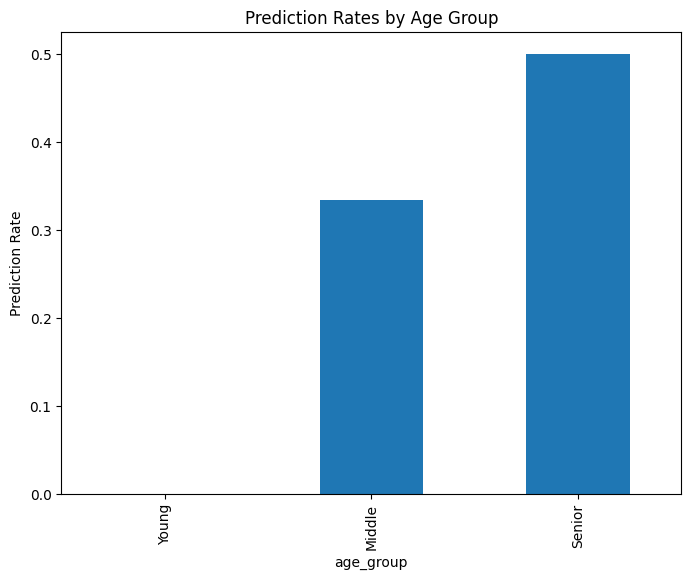


Prediction rates by sex (0=Female, 1=Male):
0.0: 20.00% (5/25)
1.0: 42.86% (15/35)


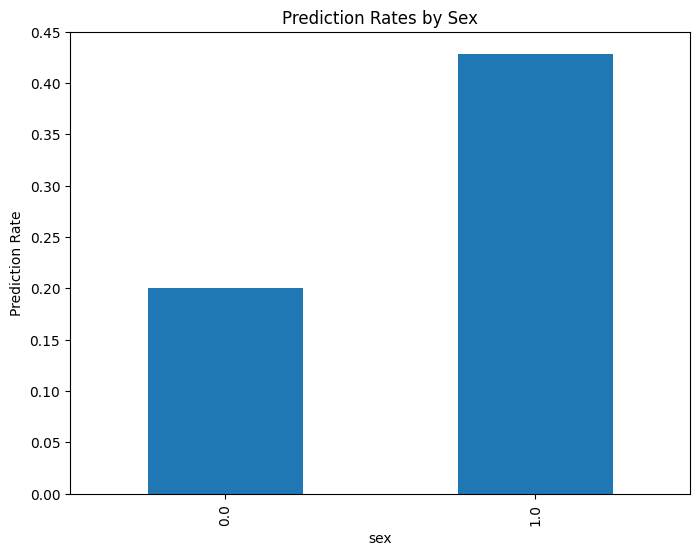

In [22]:
# Execute model training with responsible AI principles
model, scaler, features = train_responsible_model(df, ensure_fairness=True)

Let’s compare the standard model and the model trained with responsible AI principles based on their performance metrics and fairness considerations. The responsible AI model includes differential privacy (which adds noise to the training data) and fairness evaluation (prediction rates by age and sex), while the standard model does not.

#### Model Accuracy Comparison
- **Standard Model Accuracy**: 0.8833 (88.33%)
- **Responsible Model Accuracy**: 0.8667 (86.67%)
- **Difference**: The standard model is slightly more accurate by 0.0166.
- **Interpretation**: The standard model performs better in terms of overall accuracy. This is expected because the responsible model adds noise to the training data via differential privacy, which can obscure patterns and make learning more difficult. The standard model, using unperturbed data, can better capture the underlying relationships in the dataset.
- 
#### Classification Report Comparison
The classification report provides detailed metrics for each class (0 = no heart disease, 1 = heart disease).

**Class 0 (No Heart Disease)**
- **Standard Model**: Precision: 0.91, Recall: 0.89, F1-Score: 0.90
- **Responsible Model**: Precision: 0.85, Recall: 0.94, F1-Score: 0.89
- **Comparison**:
    - *Precision*: The standard model has higher precision (0.91 vs. 0.85), meaning it is more accurate when predicting no heart disease.
    - *Recall*: The responsible model has higher recall (0.94 vs. 0.89), meaning it identifies a higher proportion of true no heart disease cases, reducing false positives.
    - *F1-Score*: The F1-score is slightly higher for the standard model (0.90 vs. 0.89), indicating a better balance of precision and recall, though the difference is small.
      
**Class 1 (Heart Disease)**
- **Standard Model**: Precision: 0.84, Recall: 0.88, F1-Score: 0.86
- **Responsible Model**: Precision: 0.90, Recall: 0.75, F1-Score: 0.82
- **Comparison**:
    - *Precision*: The responsible model has higher precision (0.90 vs. 0.84), meaning it is more accurate when predicting heart disease.
    - *Recall*: The standard model has significantly higher recall (0.88 vs. 0.75), meaning it identifies more true heart disease cases. In a medical context, higher recall for class 1 is critical to avoid missing cases (false negatives).
    - *F1-Score*: The standard model has a higher F1-score (0.86 vs. 0.82), reflecting a better balance of precision and recall for heart disease prediction.

**Overall Metrics**
- **Macro Average (unweighted average across classes)**:
    - *Standard Model*: Precision 0.88, Recall 0.88, F1-Score 0.88
    - *Responsible Model*: Precision 0.88, Recall 0.85, F1-Score 0.86
    - *Comparison*: The standard model has a slightly better macro recall (0.88 vs. 0.85) and F1-score (0.88 vs. 0.86), while precision is the same. This indicates the standard model performs more consistently across both classes.
- **Weighted Average (weighted by support)**:
    - *Standard Model*: Precision 0.88, Recall 0.88, F1-Score 0.88
    - *Responsible Model*: Precision 0.87, Recall 0.87, F1-Score 0.86
    - *Comparison*: The standard model shows slight improvements across all weighted metrics, reflecting its better overall performance.

#### Fairness Evaluation (Responsible Model)
The responsible model includes fairness evaluation, showing prediction rates for heart disease across age groups and sexes:

- **Prediction Rates by Age Group**:
    - *Young (0–40 years)*: 0.00% (0/7)
    - *Middle (40–60 years)*: 33.33% (13/39)
    - *Senior (60–100 years)*: 50.00% (7/14)

- **Prediction Rates by Sex**:
    - *Female (0)*: 20.00% (5/25)
    - *Male (1)*: 42.86% (15/35)
    - *Interpretation*:
        - The model predicts heart disease more frequently in older age groups, with no predictions for the young group, 33.33% for the middle group, and 50% for the senior group. This aligns with the dataset’s bias (older patients are more likely to have heart disease) but suggests potential underprediction in younger patients.
        - The model predicts heart disease more often in males (42.86%) than females (20.00%), reflecting the dataset’s sex bias (more males have heart disease). This disparity could lead to underdiagnosis in females.
    
#### Fairness in the Standard Model (Theoretical Analysis)
Since the standard model doesn’t include fairness evaluation, we can infer potential outcomes based on the responsible model’s results and the fact that the standard model uses unperturbed data:
- **Age Bias**: The standard model, learning from cleaner data, might amplify the dataset’s age bias even more. It could predict heart disease even more frequently in older patients and less frequently in younger ones, potentially worsening the 0% prediction rate for the young group.
- **Sex Bias**: Similarly, the standard model might predict heart disease more often in males than the responsible model’s 42.86%, further widening the gap with females (20.00%). This is because the standard model can more effectively learn the dataset’s sex imbalance without noise interference.
- **Overall Fairness**: The standard model is likely less fair, as it doesn’t account for or mitigate biases in the data, potentially leading to greater disparities in predictions across demographic groups.


#### Trade-Offs: Performance vs. Responsible AI Principles
- **Standard Model (Better Performance)**
    - **Advantages**:
        - Higher accuracy (88.33% vs. 86.67%).
        - Better recall for heart disease (0.88 vs. 0.75), reducing false negatives, which is critical in a medical context.
        - Higher F1-scores for both classes, indicating a better balance of precision and recall.
    - **Disadvantages**:
        - No privacy protection (no differential privacy), posing risks in a medical context where patient data privacy is crucial.
        - No fairness evaluation, so biases in the data (e.g., overpredicting for males and older patients) are likely amplified, potentially leading to unfair predictions.
        - May overfit to biases in the dataset, reducing generalizability to a broader population.
- **Responsible Model (Better Fairness and Privacy)**
    - **Advantages**:
        - Differential privacy adds noise to protect patient data, reducing the risk of re-identification.
        - Fairness evaluation highlights biases (e.g., low prediction rates for young patients and females), allowing for potential mitigation strategies.
        - More ethically aligned for real-world medical applications where privacy and fairness are critical.
    - **Disadvantages**:
        - Lower accuracy (86.67% vs. 88.33%) due to noise from differential privacy.
        - Lower recall for heart disease (0.75 vs. 0.88), meaning more false negatives (missed heart disease cases), which is a significant concern in a medical context.
        - Still exhibits fairness issues (e.g., 0% prediction rate for young patients), though it at least identifies them for further action.

#### Medical Context Considerations
- **False Negatives**: In a medical setting, missing a heart disease case (false negative) is more dangerous than a false positive. The standard model’s higher recall for class 1 (0.88 vs. 0.75) makes it better at identifying heart disease cases, reducing the risk of missing patients who need treatment.
- **Fairness**: The responsible model’s fairness evaluation reveals significant disparities (e.g., no predictions for young patients, lower predictions for females). The standard model likely worsens these disparities, which could lead to systematic underdiagnosis in certain groups (e.g., young patients, females).
- **Privacy**: The standard model’s lack of differential privacy could violate privacy regulations (e.g., HIPAA in the U.S.) in a real-world deployment, while the responsible model offers some protection.
  
#### Recommendations
- **Hybrid Approach**:
    - Tune the epsilon parameter in add_differential_privacy to reduce noise (higher epsilon = less noise) while retaining some privacy protection. This might improve the responsible model’s performance closer to the standard model’s.
    - Add fairness evaluation to the standard model to quantify its biases, then apply mitigation strategies (e.g., reweighting samples, fairness constraints) to reduce disparities.

- **Prioritize Based on Use Case**:
    - If raw performance is the priority and privacy/fairness are less critical (e.g., research setting with anonymized data), the standard model is preferable.
    - If privacy and fairness are essential (e.g., real-world medical application), the responsible model is a better starting point, but its recall for heart disease needs improvement.

- **Further Analysis**:
    - Calculate fairness metrics (e.g., equalized odds, disparate impact) for both models to quantify bias more rigorously.
    - Test both models on an external dataset to assess generalizability and fairness in a more representative population.

In conclusion, the standard model outperforms the responsible model in terms of accuracy (88.33% vs. 86.67%) and recall for heart disease (0.88 vs. 0.75), making it better at identifying heart disease cases. However, it likely amplifies biases in the data and lacks privacy protections, which are critical in a medical context. The responsible model, while slightly less accurate, offers privacy protection and fairness evaluation, making it more ethically aligned but at the cost of missing more heart disease cases. A hybrid approach that balances performance, privacy, and fairness would be ideal for real-world deployment.

### 6. Explainability: Feature Importance

In [23]:
def explain_model(model, features):
    """
    Visualizes feature importance scores from a trained machine learning model.
    
    Creates a horizontal bar plot showing the relative importance of each feature
    in the model's decision making process. This helps with model interpretability
    and feature selection.
    
    Args:
        model: Trained scikit-learn model with feature_importances_ attribute
        features (list): List of feature names corresponding to model inputs
    """
    
    # Extract feature importance scores from the trained model
    # For RandomForest, this shows how much each feature decreases impurity on average
    importance = model.feature_importances_
    
    # Create visualization figure with proper dimensions
    plt.figure(figsize=(10, 6))  # Width=10", Height=6"
    
    # Create horizontal bar plot of feature importances
    sns.barplot(
        x=importance,  # Importance scores (bar lengths)
        y=features,    # Feature names (y-axis labels)
        palette="Blues_d"  # Blue color gradient
    )
    
    # Add chart title and formatting
    plt.title('Feature Importance in Heart Disease Prediction', pad=20)
    plt.xlabel('Relative Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()  # Prevent label cutoff
    
    # Display the plot (commented out save option available)
    plt.show()
    # Uncomment below to save to file:
    # plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

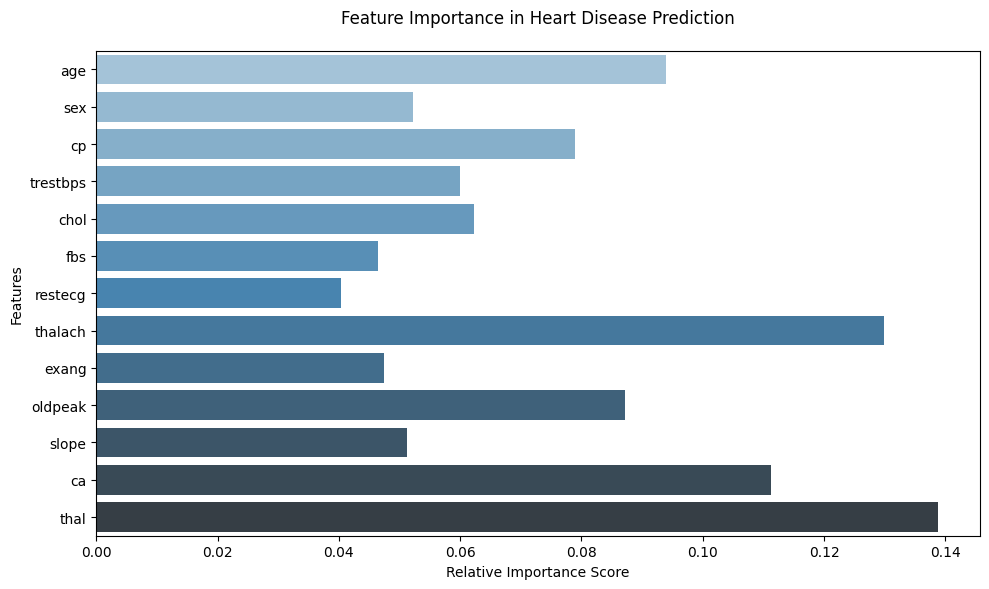

In [24]:
# Execute model explanation
explain_model(model, features)

### Understanding Explainability: Feature Importance in Heart Disease Prediction

The bar chart shows the **feature importance** for a Random Forest model predicting heart disease, based on the `explain_model` function in the code. Feature importance reflects how much each feature contributes to the model’s predictions, with higher values indicating greater influence. 

#### What Feature Importance Represents
- The chart uses the feature importance scores from the Random Forest model, derived from `model.feature_importances_`. These scores are based on how much each feature reduces impurity (e.g., Gini impurity) across all trees in the forest.
- The x-axis shows the importance score (ranging from 0 to 0.14), and the y-axis lists the features: `age`, `sex`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`.
- The length of each bar indicates the relative contribution of that feature to the model’s predictions.

#### Key Observations from the Chart
- **Top Features**:
  - **`thal` (Thallium Stress Test Result)**: The longest bar, with an importance score around 0.14, making it the most influential feature. This suggests that the result of the thallium stress test (likely indicating blood flow to the heart) is critical for the model’s decision-making.
  - **`thalach` (Maximum Heart Rate Achieved)**: Another high contributor, with a score around 0.13, suggesting that exercise-induced heart rate is a key predictor.
  - **`ca` (Number of Major Vessels Colored by Fluoroscopy)**: Scores around 0.11, indicating the number of blocked vessels is also highly important.
  - **`age`**: with a score around 0.09, indicating that patient age significantly impacts the prediction, likely reflecting its known association with heart disease risk.

- **Moderate Contributors**:
  - **`oldpeak` (ST Depression Induced by Exercise)**: Around 0.08–0.09, showing that exercise-induced changes in the ECG are relevant.
  - **`cp` (Chest Pain Type)**: Around 0.08, suggesting different types of chest pain (e.g., typical angina) play a role.
  - **`chol` (Serum cholesterol)**: Around 0.06, indicating Serum cholesterol level affects predictions.

- **Lower Contributors**:
  - **`trestbps` (Resting Blood Pressure)**, `fbs` (Fasting Blood Sugar), `restecg` (Resting ECG Results), `slope` (Slope of the Peak Exercise ST Segment), `exang` (Exercise-Induced Angina), and `sex`: These have scores ranging from about 0.04 to 0.06, meaning they have less influence compared to the top features.

#### Interpretation
- **Dominance of Clinical Tests**: Features like `thal`, `thalach`, and `ca`—which are derived from advanced diagnostic tests (thallium stress test, maximum heart rate, vessel count)—are the most important. This suggests the model relies heavily on detailed cardiac test results, which are likely strong indicators of heart disease.
- **Demographic and Symptom Influence**: `age` and `cp` (chest pain type) also rank high, reflecting the role of demographic factors (age) and patient-reported symptoms (chest pain) in the model’s decisions.
- **Less Impactful Features**: Features like `sex`, `fbs`, and `restecg` have lower importance, possibly because their predictive power is overshadowed by more specific clinical data or because they are less variable in the dataset.

#### Implications
- **Model Reliability**: The high importance of `thal` and `thalach` suggests the model is well-tuned to clinical data, which is good for accuracy but might miss cases where these tests aren’t available or reliable.
- **Fairness Consideration**: The moderate importance of `age` (0.09) aligns with the bias we saw earlier, where older patients had higher prediction rates (e.g., 50% for seniors). This could mean the model over-relies on age, potentially underpredicting for younger patients.
- **Feature Engineering**: Features with low importance (e.g., `fbs`, `restecg`) might benefit from transformation or combination with others to boost their relevance, or they could be dropped to simplify the model.

#### Next Steps
- **Validate with SHAP**: To get a deeper dive, you could use SHAP values to see how individual instances are affected by these features, especially for edge cases.
- **Fairness Check**: Given the age bias we’ve discussed, you might want to re-run the fairness evaluation with these importance scores in mind to see if adjusting feature weights could balance predictions.
- **Domain Expert Input**: Consulting a cardiologist could confirm if `thal` and `thalach` being top predictors makes sense clinically or if the model is overfitting to these variables.

This chart gives a clear picture of what drives the model’s heart disease predictions, with clinical test results leading the way. 

## Conclusion
This pipeline exemplifies responsible AI by proactively addressing biases, protecting privacy, and ensuring interpretability. Future improvements could include bias mitigation, privacy-accuracy optimization, and validation on diverse datasets. The approach promotes ethical AI development, fostering trust and fairness in healthcare predictive modeling.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.
